In [2]:
from sklearn import datasets
import numpy as np
database=datasets.load_iris()
database

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
total_data=database.data
label=database.target
total_data, label

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [4]:
def distance(a,b):
    d=np.sqrt(np.square(a[0]-b[0])+np.square(a[1]-b[1])+np.square(a[2]-b[2])+np.square(a[3]-b[3]))
    return(d)

def find_neighbor(train_data,train_label,test_point,k=3):
    output=[]
    for i in range(len(train_data)):
        d=distance(train_data[i],test_point)
        index=i
        label=train_label[i]
        output.append((d,index,label))
    output.sort()
    neigh=[]
    for i in range(k):
        neigh.append(output[i])
    return(neigh)

def predict_label(neigh,k=3):
    count=[0,0,0]
    for i in range(k):
        if(neigh[i][2]==0):
            count[0]+=1
        if(neigh[i][2]==1):
            count[1]+=1
        if(neigh[i][2]==2):
            count[2]+=1

    predicted_label=count.index(max(count))
    return predicted_label

In [5]:
total_index=np.random.permutation(150)
train_index=total_index[:120]
test_index=total_index[120:]

train_data=total_data[train_index]
test_data=total_data[test_index]

train_label=label[train_index]
test_label=label[test_index]

In [6]:
print("________________________________________")
pred_label=[]
for i in range(30):
    nei=find_neighbor(train_data,train_label,test_data[i])
    pred_label.append(predict_label(nei))
print(nei)
print("predicted_label=",pred_label)
print("actual_label    ",test_label)

________________________________________
[(0.26457513110645936, 12, 2), (0.45825756949558427, 37, 2), (0.46904157598234325, 68, 2)]
predicted_label= [1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2]
actual_label     [1 2 2 1 1 1 1 0 1 1 1 0 2 2 2 1 1 2 2 1 2 1 2 1 1 0 0 1 0 2]


In [8]:
def accuracy(predicted_label,test_label):
    c=0
    for i in range(30):
        if predicted_label[i]==test_label[i]:
            c+=1
        return(c)
from sklearn import metrics
accuracy=metrics.accuracy_score(pred_label,test_label)
#c1=int(accuracy(pred_label,test_label))
#accuracy=float((c1/30.0)*100)
#____________________________________________________________visualization_________________________
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label,pred_label)
print("acc:",accuracy)
print("confusion_matrix:",cm)

acc: 0.9333333333333333
confusion_matrix: [[ 5  0  0]
 [ 0 13  2]
 [ 0  0 10]]


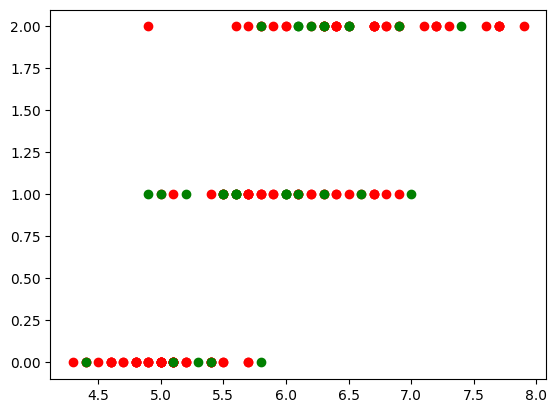

In [10]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(train_data[:,0],train_label,c='r')
plt.scatter(test_data[:,0],test_label,c="g")
#plt.scatter(test_data[:,0],pred_label,c="b")
plt.show()